# Machine Learning – Lab – Exam_17_02_2021
This is the lab exam of **Julian Sherollari**, matr. 1000248, [julian.sherollari@studio.unibo.it](mailto:julian.sherollari@studio.unibo.it)


In [ ]:
# imports

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder

rnd_state = 27

In [ ]:
# url = 'exam_2021_02_17_data.csv'
# pd.read_csv(url)

# Snippet for Google Colab execution.
try:
  from google.colab import files
  IN_COLAB = True
except:
  IN_COLAB = False
if IN_COLAB:
  uploaded = files.upload() # if executing in Colab this will open a file upload dialog


Saving exam_2021_02_17_data.csv to exam_2021_02_17_data.csv


In [ ]:
'''load and slpit the data'''
data_file = 'exam_2021_02_17_data.csv'
names = ['F0', 'F1', 'F2']

df = pd.read_csv(data_file, sep='\t', names=names)
df.shape




(1001, 3)

In [ ]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse = False, dtype = np.int32)
preprocessor = ColumnTransformer(transformers = [('cat', categorical_transformer)],remainder = 'passthrough')

NameError: ignored

KMeans will be used since looking at the pairplots there is no evidence of non-convex clusters or of outliers.

In [ ]:
k_range = range(2,11) 

In [ ]:
distortions = []
silhouette_scores = []
for i in k_range:
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=rnd_state)
    y_km = km.fit_predict(X)
    distortions.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X,y_km))

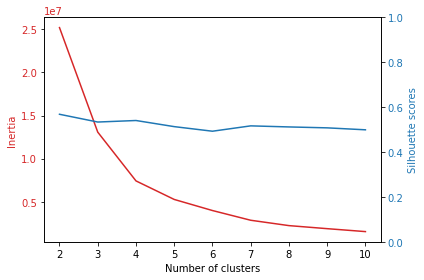

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_range, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color)
ax2.plot(k_range, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1)

fig.tight_layout()
plt.show()

In [ ]:
good_k = np.argmax(silhouette_scores) + k_range.start
print("The value of K providing the maximum silhouette index is {}".format(good_k))

The value of K providing the maximum silhouette index is 2
